# sklearnの基本

あらかじめ読み込んでおくモジュール

In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Dataset

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
data=iris.data
target=iris.target

In [3]:
pd.DataFrame(data,columns=iris.feature_names).head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [4]:
pd.DataFrame(data,columns=iris.feature_names).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# scikit-learnの基本的な流れ
1. `<model>`=`<algorism>`() : モデルのインスタンスを作る
1. `<model>`.fit(feature,label) : フィッティングを行う   
  (K-meansなど教師なしの場合は `<model>`.fit(feature))
1. `<model>`.predict(feature)   : 予測する 

## SVMの場合

- sklearnのSVMはSVC(support vector classfier)とSVR(support vector regression)の２つに分かれている

- svcはprobabilityをTrueにしなければスコアが計算できない

In [5]:
from sklearn.svm import SVC
clf_svc=SVC(probability=True) #モデルのインスタンス作成

In [6]:
before=dir(clf_svc) #モデルインスタンスが持つメソッドリスト

フィッティングと予測

In [7]:
clf_svc.fit(data[:-5],target[:-5]) #最後の5レコード以外を使って学習する

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
clf_svc.predict(data[-5:]) #最後の5レコードについて予測を行う
# ラスト5レコードは全部2なので正解

array([2, 2, 2, 2, 2])

In [9]:
after=dir(clf_svc) #学習済みのモデルインスタンスが持つメソッドリスト

学習前後でモデルのメソッドが増える。  
増えるメソッドの殆どは最後に"_"がついているはず。  
学習結果のCoefficientとか確認可能。

In [10]:
print(set(after) - set(before))

{'probA_', 'n_support_', 'probB_', '_intercept_', 'classes_', 'fit_status_', 'shape_fit_', 'intercept_', 'dual_coef_', '_dual_coef_', 'support_', 'support_vectors_', 'class_weight_', '_gamma', '_sparse'}


メソッドチェーンでのワンライナーも可能

In [11]:
SVC(probability=True).fit(data[:-5],target[:-5]).predict(data[-5:])

array([2, 2, 2, 2, 2])

予測結果のスコア  
0-1で正規化された値

In [12]:
score_svc=clf_svc.predict_proba(data[-5:])
pd.DataFrame(score_svc,columns=iris.target_names)

,setosa,versicolor,virginica
0,0.011340,0.022454,0.966206
1,0.012091,0.098005,0.889904
2,0.010348,0.053140,0.936512
3,0.012952,0.010192,0.976856
4,0.011374,0.099246,0.889380


In [13]:
clf_svc.decision_function_shape="ovr"
clf_svc.decision_function(data[-5:])
# SVMは識別境界面からの距離もスコアリングに使える
# でもちょっと使いにくいかも？

array([[ 0.38354193,  1.06620179,  1.55025628],
       [ 0.41971932,  0.92873543,  1.65154525],
       [ 0.41020748,  0.98579653,  1.60399599],
       [ 0.3576206 ,  1.1423794 ,  1.5       ],
       [ 0.42293297,  0.92995685,  1.64711017]])

# RFの場合

基本はSVMと同じ

In [14]:
# RFはensembleというモジュールの中に入っている
from sklearn.ensemble import RandomForestClassifier as RFC
clf_rfc=RFC()

In [15]:
clf_rfc.fit(data[:-5],target[:-5])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
clf_rfc.predict(data[-5:])

array([2, 2, 2, 2, 2])

In [17]:
# スコア
clf_rfc.predict_proba(data[-5:])

array([[ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0.1,  0.9]])

## sklearn準拠のモデルであれば、
## 同じ操作で予測モデルが作れる  
sklearn準拠の話は[この辺](http://yamaguchiyuto.hatenablog.com/entry/python-advent-calendar-2014)参照

# 線形回帰の場合

線形回帰用のDataset(糖尿病トイデータ)の読み込み

In [18]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()
diab_dat=diabetes.data
diab_target=diabetes.target

こんな感じ

In [19]:
pd.DataFrame(diab_dat).head() # 記述子は10個の検査値

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [20]:
pd.DataFrame(diab_target).T # 被説明変数は１年後の血糖値

,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,438,439,440,441
0,151.0,75.0,141.0,206.0,135.0,97.0,138.0,63.0,110.0,310.0,...,173.0,72.0,49.0,64.0,48.0,178.0,104.0,132.0,220.0,57.0


基本は一緒

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
reg=LinearRegression()
reg.fit(diab_dat[:-20],diab_target[:-20]) #最後の20個以外で学習

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
reg.predict(diab_dat[-20:]) #最後の20個を予測

array([ 197.61846908,  155.43979328,  172.88665147,  111.53537279,
        164.80054784,  131.06954875,  259.12237761,  100.47935157,
        117.0601052 ,  124.30503555,  218.36632793,   61.19831284,
        132.25046751,  120.3332925 ,   52.54458691,  194.03798088,
        102.57139702,  123.56604987,  211.0346317 ,   52.60335674])

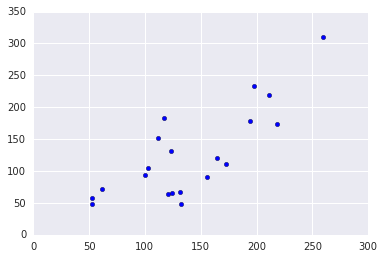

In [24]:
# 実測値と予測値の比較
plt.scatter(reg.predict(diab_dat[-20:]),diab_target[-20:])

# **回帰の場合も基本的には一緒**

# クラスタリングの場合

これも一緒

In [25]:
from sklearn.cluster import KMeans
Kcluster=KMeans(n_clusters=3).fit(data).predict(data) #メソッドチェーン
Kcluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

# 次元削減

次元削減の時はpredictじゃなくてtransformになる

In [26]:
from sklearn.decomposition import PCA
pc=PCA(n_components=2).fit(data).transform(data)

PCAの結果の表示

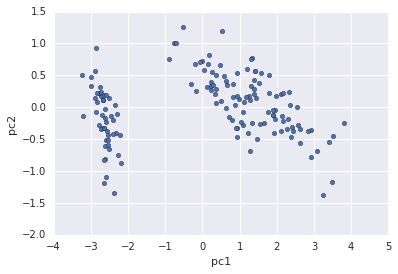

In [27]:
PCA_result=pd.DataFrame(pc,columns=["pc1","pc2"])
PCA_result.plot(kind='scatter',x="pc1",y="pc2")

おまけ  
PCAで二次元に圧縮してKmeansの結果を見る

In [28]:
#実際のラベル、Kmeansのクラス分け結果、PCAの結果をconcatenateする
rslt=pd.concat(
    [pd.DataFrame(target,columns=['target']),
     pd.DataFrame(Kcluster,columns=['class']),
     PCA_result],
    axis=1)

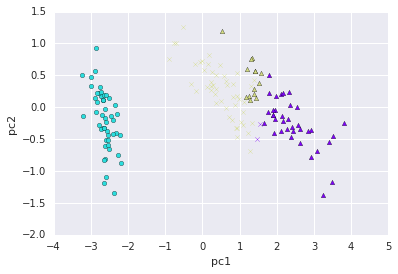

In [29]:
fig, ax = plt.subplots(1, 1)
cmap = plt.get_cmap('rainbow')
marker=["o","x","^"]
for i in range(3):
    tmp=rslt[rslt["class"]==i]
    for j in range(3):
        tmp2=tmp[tmp["target"]==j]
        if tmp2.shape[0]!=0:
            tmp2.plot(
                kind="scatter",x="pc1",y="pc2",ax=ax,c=cmap(i/3),marker=marker[j]
            )

# その他
- scikit-learnはpandasのDataframeを入力に使えるが、**出力はnumpyのarray**になってしまう。
- そのためpandas-mlというパッケージもあるが今回は省略。

In [30]:
df_iris=pd.DataFrame(iris.data)
print(type(df_iris))

<class 'pandas.core.frame.DataFrame'>


In [31]:
pca_iris=PCA().fit(df_iris).transform(df_iris)
print(type(pca_iris))

<class 'numpy.ndarray'>


# pandasについて
- sklearnにも前処理の機能はありますが、pandasを使ったほうがいいことも多いです。
- 長くなるのでpandasの説明も割愛します。
- matplotlibのwrapper APIもあるので、pandasで簡単な描画も可能です。
- pandasは今のところ、[このページ](http://sinhrks.hatenablog.com/entry/2015/04/28/235430)が一番まとまっていると思います。

# 終わり
@y__sama
